In [1]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/ktmb/ets_2025.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

             date   time         origin    destination  ridership
0      2025-01-01  00:00     Batu Gajah     Alor Setar          1
1      2025-01-01  00:00     Batu Gajah           Arau          1
2      2025-01-01  00:00     Batu Gajah   Padang Besar          1
3      2025-01-01  00:00         Kampar   Padang Besar          2
4      2025-01-01  00:00  Tanjong Malim     Alor Setar          1
...           ...    ...            ...            ...        ...
179909 2025-05-15  23:00   Sungai Buloh     Alor Setar          4
179910 2025-05-15  23:00   Sungai Buloh           Arau          3
179911 2025-05-15  23:00   Sungai Buloh   Padang Besar         35
179912 2025-05-15  23:00   Sungai Buloh  Sungai Petani          1
179913 2025-05-15  23:00  Tanjong Malim           Ipoh          2

[179914 rows x 5 columns]


In [2]:
df.sort_values(by='date', ascending=False)

,date,time,origin,destination,ridership
179913,2025-05-15,23:00,Tanjong Malim,Ipoh,2
179025,2025-05-15,10:00,Kuala Kangsar,Padang Besar,5
179047,2025-05-15,10:00,Sungai Petani,Batu Gajah,1
179048,2025-05-15,10:00,Sungai Petani,Ipoh,4
179049,2025-05-15,10:00,Sungai Petani,KL Sentral,58
...,...,...,...,...,...
846,2025-01-01,16:00,Seremban,Sungai Buloh,2
847,2025-01-01,16:00,Seremban,Taiping,3
848,2025-01-01,16:00,Seremban,Tanjong Malim,1
849,2025-01-01,16:00,Seremban,Tapah Road,3


In [3]:
#df = df.sample(frac=0.1,random_state=42)
#df = df.head(10)
#df = df[df['destination']=='Pulau Sebang (Tampin)']

In [4]:
df['destination'].value_counts()

destination
KL Sentral               18664
Ipoh                     16376
Sungai Buloh             12440
Taiping                  10147
Kampar                    9236
Tanjong Malim             9075
Batu Gajah                8845
Kuala Lumpur              7675
Butterworth               6538
Parit Buntar              6366
Kuala Kangsar             6154
Bukit Mertajam            6080
Arau                      5810
Alor Setar                5670
Sungai Petani             5647
Padang Besar              4270
Tapah Road                4212
Seremban                  3623
Gemas                     3470
Kajang                    3282
Pulau Sebang (Tampin)     3214
Bandar Tasek Selatan      3089
Tasek Gelugor             2794
Rawang                    2575
Batang Melaka             1862
Nibong Tebal              1826
Kepong Sentral            1708
Slim River                1526
Sungkai                   1501
Segamat                   1393
Sungai Siput              1222
Bagan Serai               1

In [5]:
df.sort_values(by=['ridership'], ascending=False)

,date,time,origin,destination,ridership
117475,2025-03-30,15:00,Ipoh,KL Sentral,349
128181,2025-04-06,15:00,Ipoh,KL Sentral,317
126514,2025-04-05,15:00,Ipoh,KL Sentral,300
29116,2025-01-23,12:00,KL Sentral,Ipoh,289
51231,2025-02-08,15:00,Ipoh,KL Sentral,282
...,...,...,...,...,...
179896,2025-05-15,22:00,Kuala Lumpur,Padang Besar,1
179897,2025-05-15,22:00,Rawang,Ipoh,1
8,2025-01-01,00:00,Tanjong Malim,Tasek Gelugor,1
6,2025-01-01,00:00,Tanjong Malim,Ipoh,1


In [6]:
df.groupby('origin')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)

,origin,ridership
13,KL Sentral,497728
12,Ipoh,198639
9,Butterworth,101532
28,Sungai Buloh,65650
8,Bukit Mertajam,64320
21,Padang Besar,60115
32,Taiping,56361
29,Sungai Petani,42845
7,Batu Gajah,41680
0,Alor Setar,40713


In [7]:
df.groupby('destination')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)

,destination,ridership
13,KL Sentral,490710
12,Ipoh,196320
9,Butterworth,109785
28,Sungai Buloh,68160
8,Bukit Mertajam,64041
21,Padang Besar,61759
32,Taiping,56901
29,Sungai Petani,42651
0,Alor Setar,42040
7,Batu Gajah,39047


Sankey Chart

In [8]:
# import plotly.graph_objects as go

# #combine all unique labels
# labels = list(pd.unique(df[['origin', 'destination']].values.ravel()))

# # map origin and destination
# df['source'] = df['origin'].apply(lambda x:labels.index(x))
# df['target'] = df['destination'].apply(lambda x:labels.index(x))



In [9]:
# fig = go.Figure(data=[go.Sankey(
#     node=dict(
#         pad=15,
#         thickness = 20,
#         line = dict(color="black", width=0.5),
#         label=labels
#     ),
#     link=dict(
#         source=df['source'],
#         target=df['target'],
#         value=df['ridership']
#     )
# )])

In [10]:
# import plotly.io as pio
# pio.renderers.default = 'browser'
# fig.show()

In [11]:
df['hour'] = pd.to_datetime(df['time']).dt.hour

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4436\2517406752.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [13]:
# group and aggregater ridership by date
daily_ridership = df.groupby('date')['ridership'].sum().reset_index()

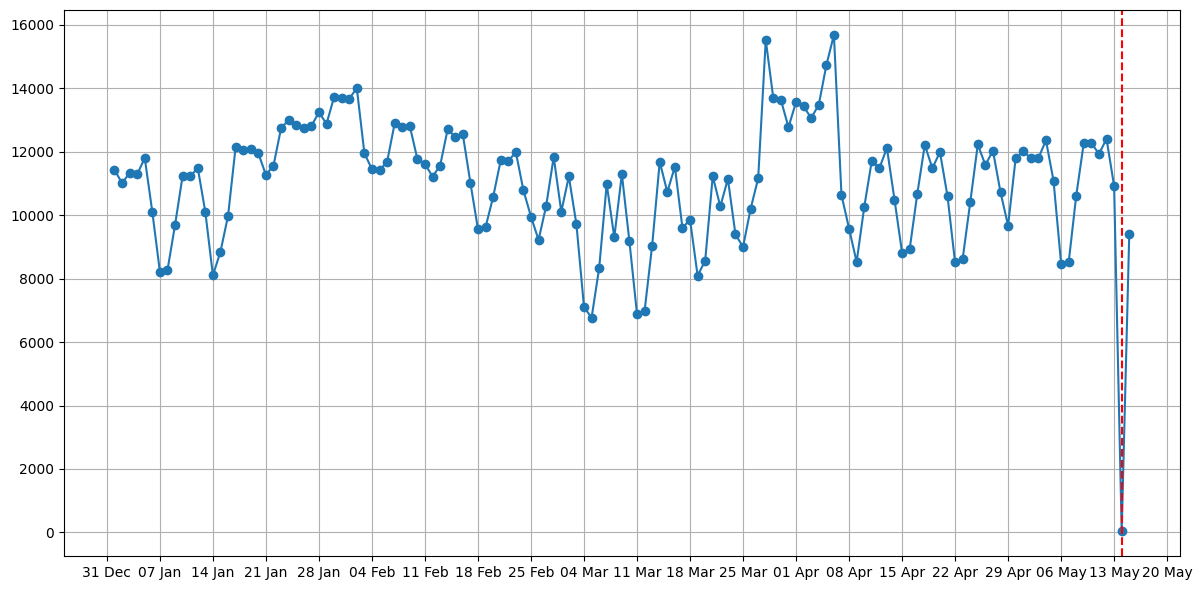

In [28]:
# plot the graph
plt.figure(figsize=(12,6))
plt.plot(daily_ridership['date'],daily_ridership['ridership'],marker='o')
plt.grid(True)
plt.tight_layout()

# Draw vertical line at 14 May 2025
highlight_date = datetime.strptime('14/5/2025', '%d/%m/%Y')
plt.axvline(x=highlight_date, color='red', linestyle='--', label='14 May 2025')

#configure x axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))


plt.show()

In [29]:
# heatmap

df['day'] = pd.to_datetime(df['date']).dt.day_name()
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

# pivot table
pivot = df.pivot_table(index='day', columns='hour', values='ridership', aggfunc='mean')

# day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(day_order)

In [16]:
pivot

hour,0,1,2,3,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Monday,2.368794,2.547170,1.150000,1.500000,11.055961,9.052713,7.814543,9.266535,6.670829,5.316415,...,5.288177,15.962482,5.281792,6.036960,9.665804,6.315867,5.902868,8.277961,6.326807,3.472000
Tuesday,2.391667,3.275362,1.928571,1.400000,11.383412,8.584942,7.275000,8.361239,6.382683,5.213099,...,5.205814,14.179429,5.059125,5.452564,8.768364,5.866213,5.698516,7.737815,6.425121,3.613139
Wednesday,2.661157,2.987654,2.611111,1.500000,10.646179,7.853846,7.379573,8.351796,5.995604,5.515326,...,5.285047,13.938497,5.164540,5.110504,9.029995,6.341906,6.328316,8.316558,8.092084,3.956175
Thursday,2.887755,3.683333,2.500000,1.300000,10.077882,8.517375,8.330680,8.702770,6.245005,5.604556,...,6.423156,14.665732,5.371529,5.138829,9.582355,6.932292,7.077593,10.307042,9.330460,4.913534
Friday,3.214286,3.242857,1.529412,2.750000,10.703937,9.806452,8.759785,10.039000,6.565194,5.357011,...,6.475621,16.194602,5.877968,5.573062,9.765245,6.696142,7.330068,11.641485,9.832579,5.033742
Saturday,3.561644,3.022989,1.576923,1.300000,13.887120,12.950920,8.633916,10.797245,7.038565,5.293002,...,6.076035,15.549466,5.512322,5.866549,9.908158,6.732867,6.509599,9.637427,7.721992,3.693662
Sunday,2.430657,2.735294,1.750000,1.571429,12.130933,11.731501,8.606083,9.646166,6.661133,5.279946,...,5.356938,17.515965,5.636480,6.805248,10.666978,6.911765,7.198473,9.408813,7.794654,3.650000


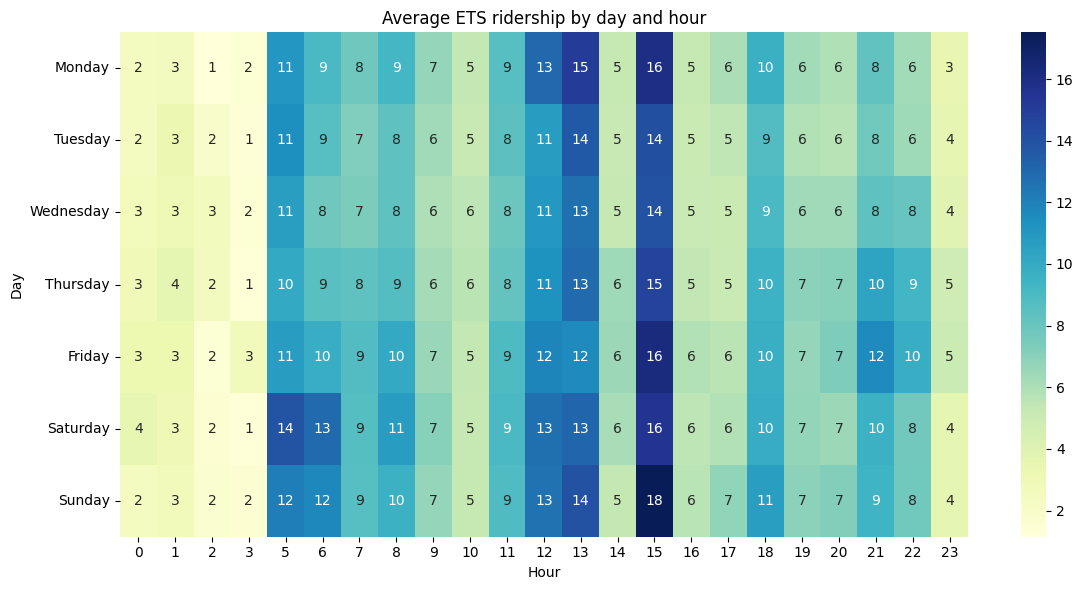

In [17]:
# plot heatmap
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Average ETS ridership by day and hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.tight_layout()
plt.show()

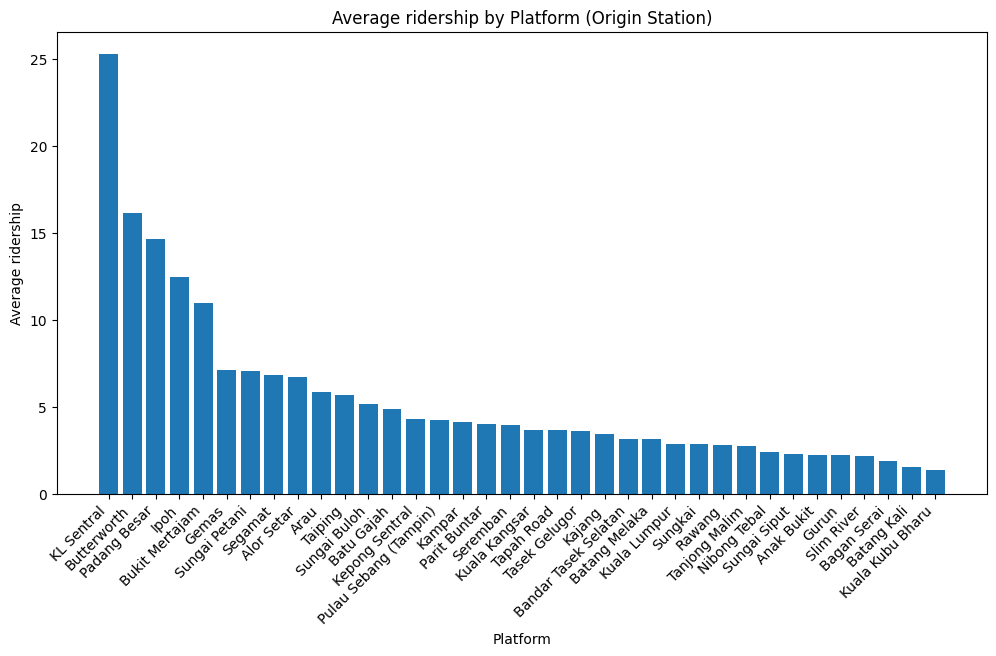

In [18]:
# bar graph
platform_ridership = df.groupby('origin')['ridership'].mean().reset_index()
platform_ridership = platform_ridership.sort_values(by='ridership',ascending=False)

plt.figure(figsize=(12,6))
plt.bar(platform_ridership['origin'], platform_ridership['ridership'])
plt.title("Average ridership by Platform (Origin Station)")
plt.xlabel("Platform")
plt.ylabel("Average ridership")
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
df_kl_sentral = df[df['origin']=='KL Sentral']
df_kl_sentral['ridership'].sum()

np.int64(497728)

In [20]:
df_kl_sentral.groupby(['date','hour'])['ridership'].sum().mean()

np.float64(278.8392156862745)

In [21]:
df_kl_sentral

,date,time,origin,destination,ridership,hour,day
99,2025-01-01,07:00,KL Sentral,Alor Setar,12,7,Wednesday
100,2025-01-01,07:00,KL Sentral,Arau,16,7,Wednesday
101,2025-01-01,07:00,KL Sentral,Batu Gajah,3,7,Wednesday
102,2025-01-01,07:00,KL Sentral,Ipoh,22,7,Wednesday
103,2025-01-01,07:00,KL Sentral,Kampar,2,7,Wednesday
...,...,...,...,...,...,...,...
179878,2025-05-15,22:00,KL Sentral,Padang Besar,214,22,Thursday
179879,2025-05-15,22:00,KL Sentral,Parit Buntar,4,22,Thursday
179880,2025-05-15,22:00,KL Sentral,Sungai Petani,7,22,Thursday
179881,2025-05-15,22:00,KL Sentral,Taiping,3,22,Thursday


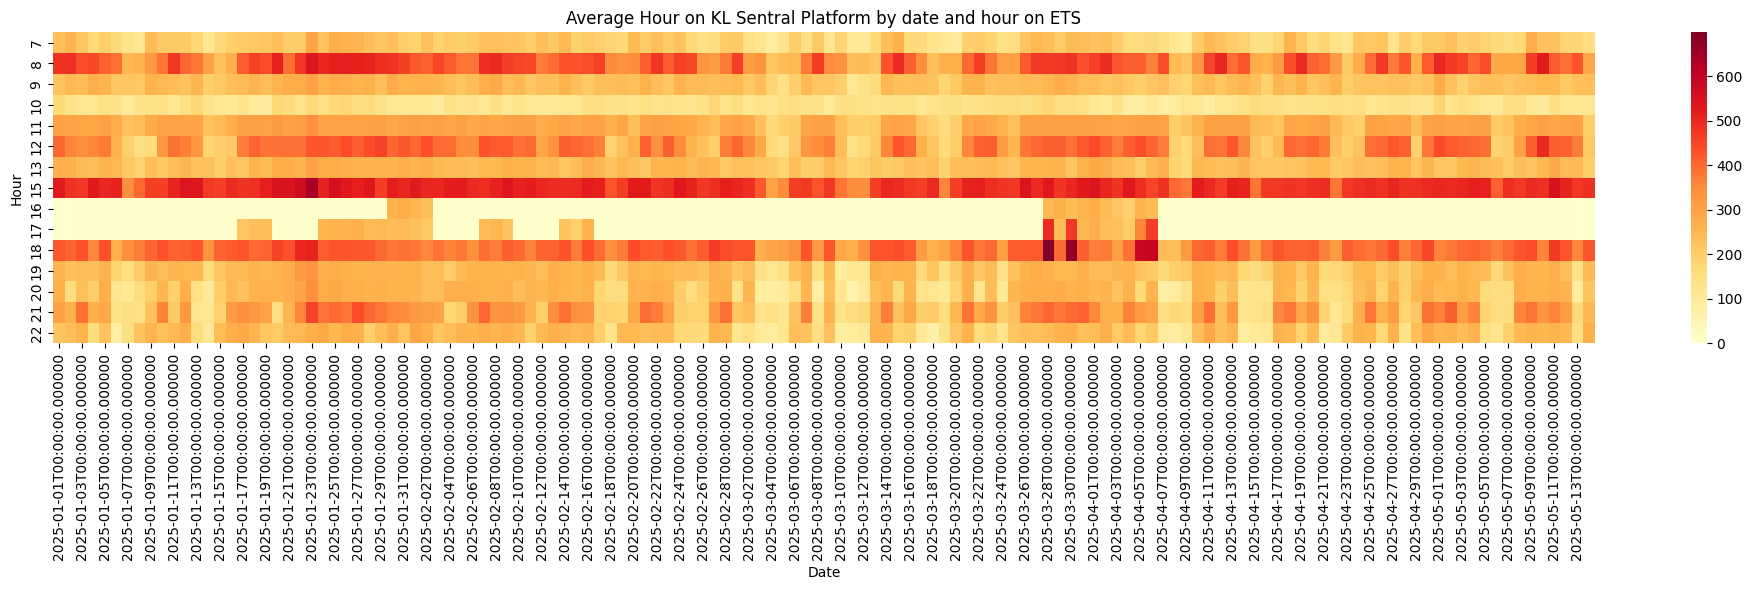

In [22]:
#When is the average busiest hour in KL Central

heatmap_data = df_kl_sentral.groupby(['date', 'hour'])['ridership'].sum().unstack(fill_value=0)
#heatmap_data = heatmap_data.reindex(day_order)

#plot heatmap
plt.figure(figsize=(20,6))
sns.heatmap(heatmap_data.T,cmap='YlOrRd')
plt.title('Average Hour on KL Sentral Platform by date and hour on ETS')
plt.xlabel('Date')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

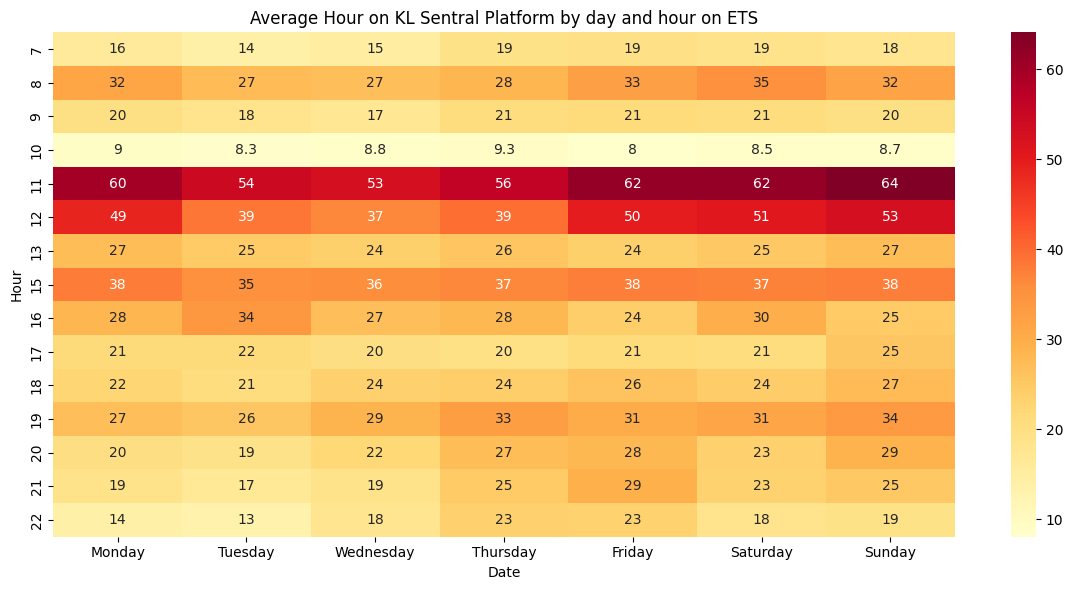

In [23]:
#When is the average busiest hour in KL Central

heatmap_data = df_kl_sentral.groupby(['day', 'hour'])['ridership'].mean().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(day_order)

#plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data.T, annot=True,cmap='YlOrRd')
plt.title('Average Hour on KL Sentral Platform by day and hour on ETS')
plt.xlabel('Date')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()


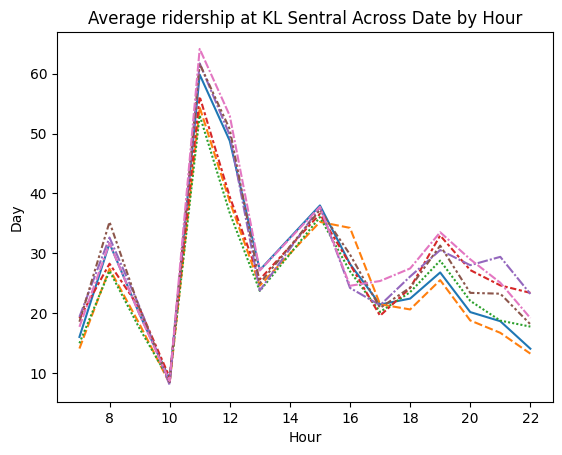

In [24]:
sns.lineplot(data=heatmap_data.T)
plt.title("Average ridership at KL Sentral Across Date by Hour")
plt.xlabel("Hour")
plt.legend().remove()
plt.ylabel("Day")
plt.show()